### Import some libraries and load data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
df = pd.read_csv('dataset.csv')
df.head()

,Start,End,Open,High,Low,Close,Volume,Market Cap
0,2024-11-19,2024-11-20,90406.06,93836.94,90406.06,92119.47,1.038971e+11,1.818537e+12
1,2024-11-18,2024-11-19,89782.53,92532.00,89453.11,90549.34,7.825716e+10,1.799246e+12
2,2024-11-17,2024-11-18,90642.34,91447.99,88768.66,89763.59,5.902029e+10,1.787376e+12
3,2024-11-16,2024-11-17,91135.39,91735.96,90131.55,90543.67,8.743721e+10,1.801356e+12
4,2024-11-15,2024-11-16,87681.91,91741.72,87140.65,90949.94,1.156032e+11,1.763629e+12


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4707 entries, 0 to 4706
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Start       4707 non-null   object 
 1   End         4707 non-null   object 
 2   Open        4707 non-null   float64
 3   High        4707 non-null   float64
 4   Low         4707 non-null   float64
 5   Close       4707 non-null   float64
 6   Volume      4707 non-null   float64
 7   Market Cap  4707 non-null   float64
dtypes: float64(6), object(2)
memory usage: 294.3+ KB


In [4]:
df.describe()

,Open,High,Low,Close,Volume,Market Cap
count,4707.000000,4707.000000,4707.000000,4707.000000,4.707000e+03,4.707000e+03
mean,14791.122668,15125.236917,14448.993594,14812.040377,2.608945e+10,2.806215e+11
std,19774.971069,20211.038246,19339.952351,19808.898442,3.684074e+10,3.841040e+11
min,4.222000,4.222000,4.222000,4.222000,0.000000e+00,3.525001e+07
25%,416.477000,421.687500,410.237500,416.583500,2.616035e+07,5.788002e+09
50%,6328.687636,6434.372794,6232.734067,6330.669843,3.950140e+09,1.099704e+11
75%,23595.945829,24158.389102,23120.778738,23650.821667,4.314177e+10,4.502643e+11
max,91135.390000,93836.940000,90406.060000,92119.470000,2.121958e+11,1.818537e+12


### Insights and Observations
1. Volatility:

The large standard deviations in Open, High, Low, and Close highlight Bitcoin's high price volatility over time.

2. Anomalies:

The minimum values of Volume (0) and Market Cap (~$35.25 million) might indicate:

Data entry errors.

Missing data for certain time periods.

Legitimate periods of low activity (e.g., very early Bitcoin history).

3. Historical Phases:

The 25th and 75th percentiles indicate significant growth over time, with prices shifting from hundreds ($416) to tens of thousands ($23,650).

#### Investigate Anomalies:

Check rows with zero Volume and unusually low Market Cap to ensure they are legitimate data points or decide how to handle them (e.g., removal or imputation).

In [5]:
print(df[df['Volume'] == 0])

           Start         End      Open      High       Low     Close  Volume  \
3981  2013-12-26  2013-12-27  683.9400  777.7500  683.9400  761.9800     0.0   
3982  2013-12-25  2013-12-26  666.3100  682.7000  649.4800  682.2100     0.0   
3983  2013-12-24  2013-12-25  672.3600  684.3900  645.7100  665.5800     0.0   
3984  2013-12-23  2013-12-24  613.0600  680.9100  611.0400  673.4100     0.0   
3985  2013-12-22  2013-12-23  601.7800  666.7400  585.6400  617.1800     0.0   
...          ...         ...       ...       ...       ...       ...     ...   
4702  2012-01-05  2012-01-06    6.9476    6.9476    6.9476    6.9476     0.0   
4703  2012-01-04  2012-01-05    5.5738    5.5738    5.5738    5.5738     0.0   
4704  2012-01-03  2012-01-04    4.8808    4.8808    4.8808    4.8808     0.0   
4705  2012-01-02  2012-01-03    5.2168    5.2168    5.2168    5.2168     0.0   
4706  2012-01-01  2012-01-02    5.2677    5.2677    5.2677    5.2677     0.0   

        Market Cap  
3981  8.823264e+09

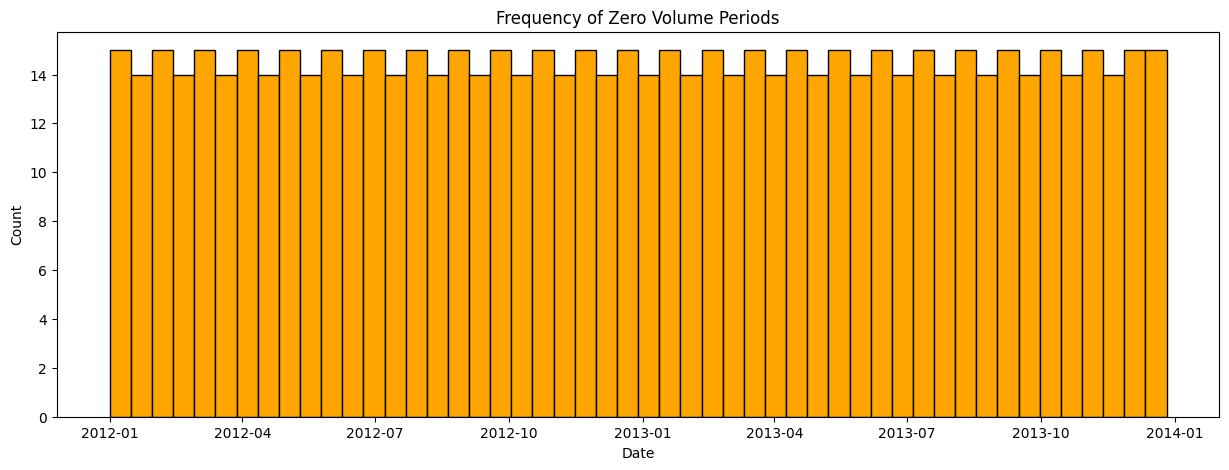

In [6]:
# Plot zero volume periods
zero_volume_dates = df[df['Volume'] == 0]['Start']
plt.figure(figsize=(15, 5))
plt.hist(pd.to_datetime(zero_volume_dates), bins=50, color='orange', edgecolor='black')
plt.title('Frequency of Zero Volume Periods')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()

#### Drop Rows with zero Volume

In [3]:
# Drop rows with zero Volume
df = df[df['Volume'] != 0]

#### Handle Duplicates

In [4]:
# Check for duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


#### Reset the Index
After dropping rows, the index may no longer be sequential. Reset it for better readability.

In [5]:
# Reset index
df = df.reset_index(drop=True)

#### Verify the Cleaned 
Check the structure and descriptive statistics of the cleaned dataset to ensure consistency.

In [6]:
# Check the cleaned dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3981 entries, 0 to 3980
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Start       3981 non-null   object 
 1   End         3981 non-null   object 
 2   Open        3981 non-null   float64
 3   High        3981 non-null   float64
 4   Low         3981 non-null   float64
 5   Close       3981 non-null   float64
 6   Volume      3981 non-null   float64
 7   Market Cap  3981 non-null   float64
dtypes: float64(6), object(2)
memory usage: 248.9+ KB


In [11]:
# Descriptive statistics
print(df.describe())

               Open          High           Low         Close        Volume  \
count   3981.000000   3981.000000   3981.000000   3981.000000  3.981000e+03   
mean   17471.174951  17865.354559  17067.588257  17495.758955  3.084729e+10   
std    20391.045401  20839.859610  19944.622849  20426.821926  3.818395e+10   
min      178.103000    211.731000    171.510000    178.795000  2.688736e+06   
25%      703.702000    715.718000    694.469000    704.294000  8.919588e+07   
50%     8416.407228   8634.384312   8179.062792   8439.846190  1.495524e+10   
75%    28809.240000  29291.740000  28260.920000  28810.020485  5.184292e+10   
max    91135.390000  93836.940000  90406.060000  92119.470000  2.121958e+11   

         Market Cap  
count  3.981000e+03  
mean   3.315945e+11  
std    3.969853e+11  
min    2.690697e+09  
25%    1.044385e+10  
50%    1.480507e+11  
75%    5.545425e+11  
max    1.818537e+12  


In [7]:
df['Start'] = pd.to_datetime(df['Start'])
df['End'] = pd.to_datetime(df['End'])

In [8]:
df.set_index('Start', inplace=True)

In [14]:
print(df.head())

                  End      Open      High       Low     Close        Volume  \
Start                                                                         
2024-11-19 2024-11-20  90406.06  93836.94  90406.06  92119.47  1.038971e+11   
2024-11-18 2024-11-19  89782.53  92532.00  89453.11  90549.34  7.825716e+10   
2024-11-17 2024-11-18  90642.34  91447.99  88768.66  89763.59  5.902029e+10   
2024-11-16 2024-11-17  91135.39  91735.96  90131.55  90543.67  8.743721e+10   
2024-11-15 2024-11-16  87681.91  91741.72  87140.65  90949.94  1.156032e+11   

              Market Cap  
Start                     
2024-11-19  1.818537e+12  
2024-11-18  1.799246e+12  
2024-11-17  1.787376e+12  
2024-11-16  1.801356e+12  
2024-11-15  1.763629e+12  


In [15]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3981 entries, 2024-11-19 to 2013-12-27
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   End         3981 non-null   datetime64[ns]
 1   Open        3981 non-null   float64       
 2   High        3981 non-null   float64       
 3   Low         3981 non-null   float64       
 4   Close       3981 non-null   float64       
 5   Volume      3981 non-null   float64       
 6   Market Cap  3981 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 248.8 KB
None


#### EDA on Numerical Data
*Plot individual trends for Open, High, Low, and Close prices.*

*Analyze the relationship between Volume and price movements.*

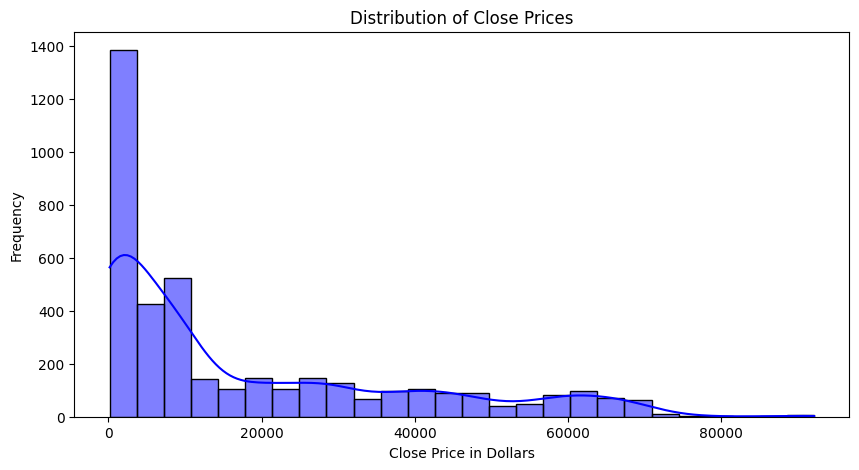

In [16]:
# Plot Distribution of Close Prices
plt.figure(figsize=(10, 5))
sb.histplot(df['Close'], kde=True, color='blue')
plt.title('Distribution of Close Prices')
plt.xlabel('Close Price in Dollars')
plt.ylabel('Frequency')
plt.show()


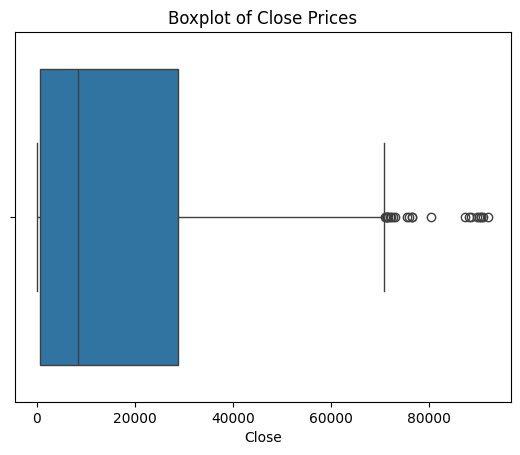

In [17]:
sb.boxplot(x=df['Close'])
plt.title('Boxplot of Close Prices')
plt.show()

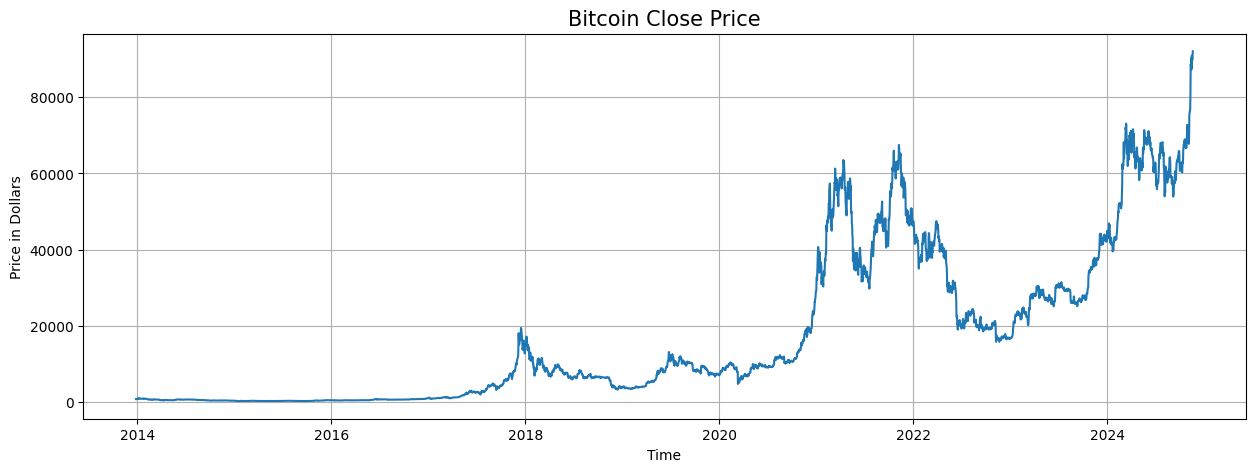

In [18]:
plt.figure(figsize=(15, 5))
plt.plot(df['Close'])
plt.title('Bitcoin Close Price', fontsize=15)
plt.xlabel('Time')
plt.ylabel('Price in Dollars')
plt.grid(True)
plt.show()


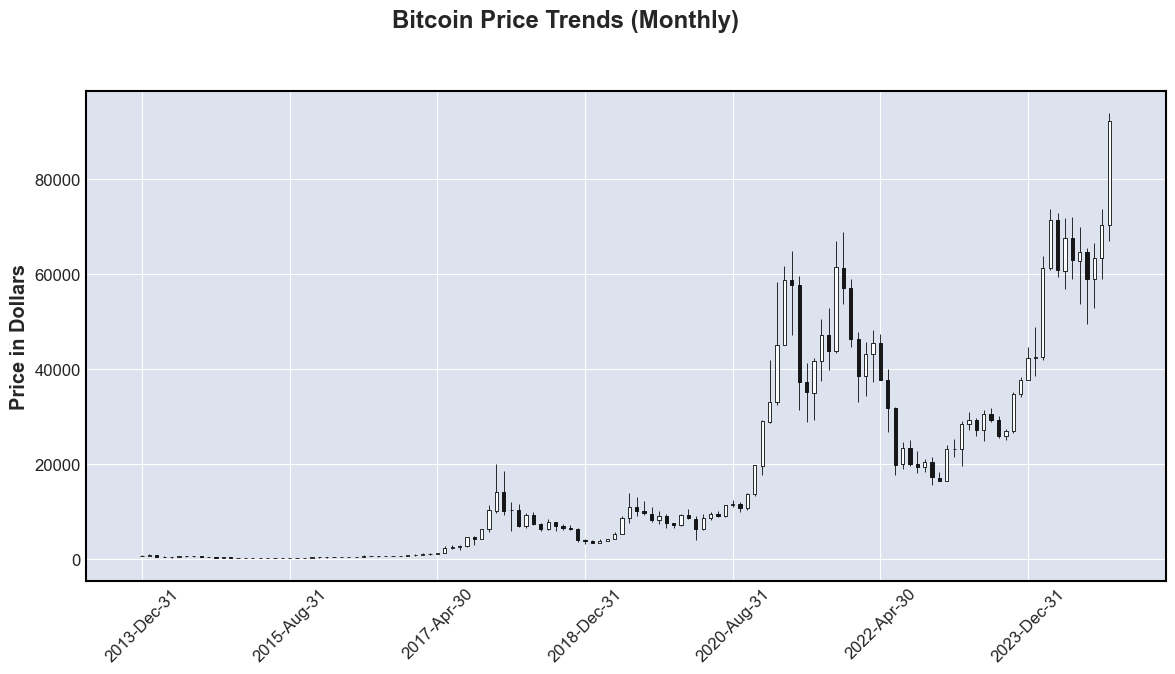

In [25]:
import mplfinance as mpf

# Resample the data to monthly frequency (you can also choose weekly 'W', daily 'D', etc.)
df_monthly = df.resample('ME').agg({'Open': 'first', 'High': 'max', 'Low': 'min', 'Close': 'last'})

# Plot the candlestick chart for the resampled data
mpf.plot(df_monthly, type='candle', figsize=(15, 7), title='Bitcoin Price Trends (Monthly)', ylabel='Price in Dollars')


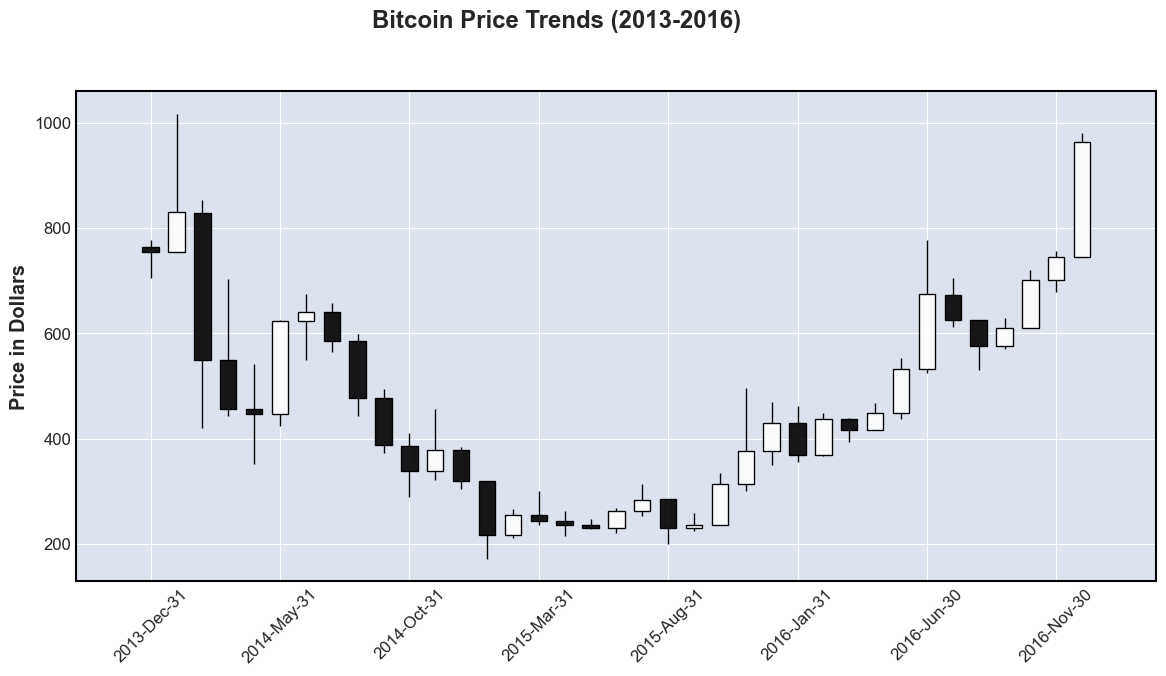

In [27]:
# Filter the data to include only the years from 2013 to 2016
df_filtered = df_monthly[(df_monthly.index.year >= 2013) & (df_monthly.index.year <= 2016)]

# Plot the candlestick chart for the filtered data (2013-2016)
mpf.plot(df_filtered, type='candle', figsize=(15, 7), title='Bitcoin Price Trends (2013-2016)', ylabel='Price in Dollars')


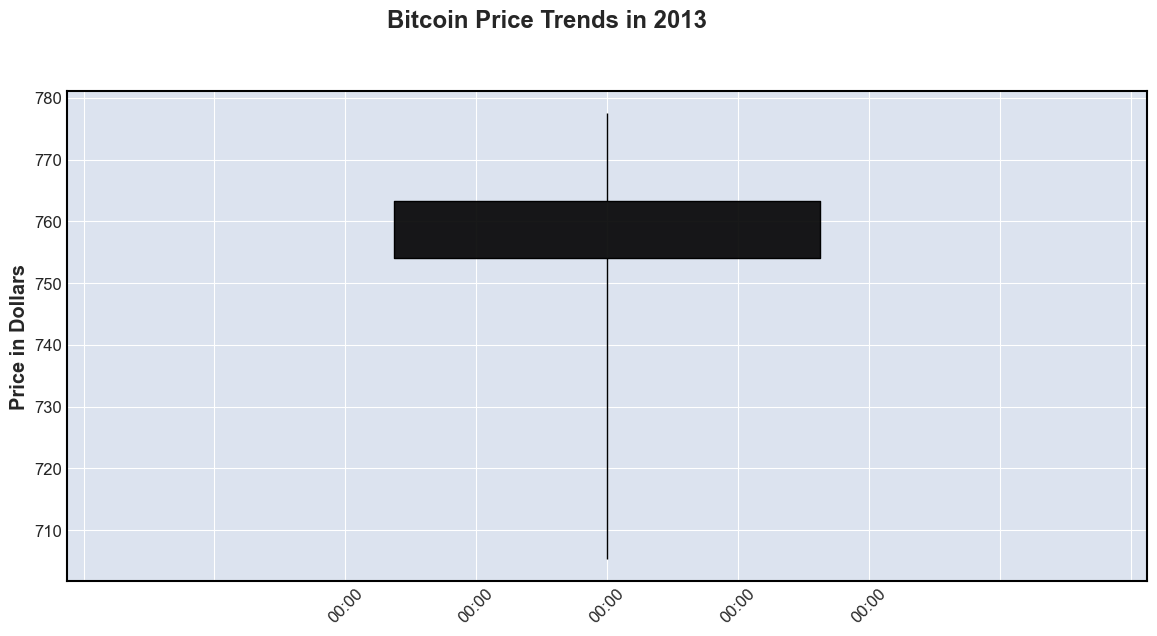

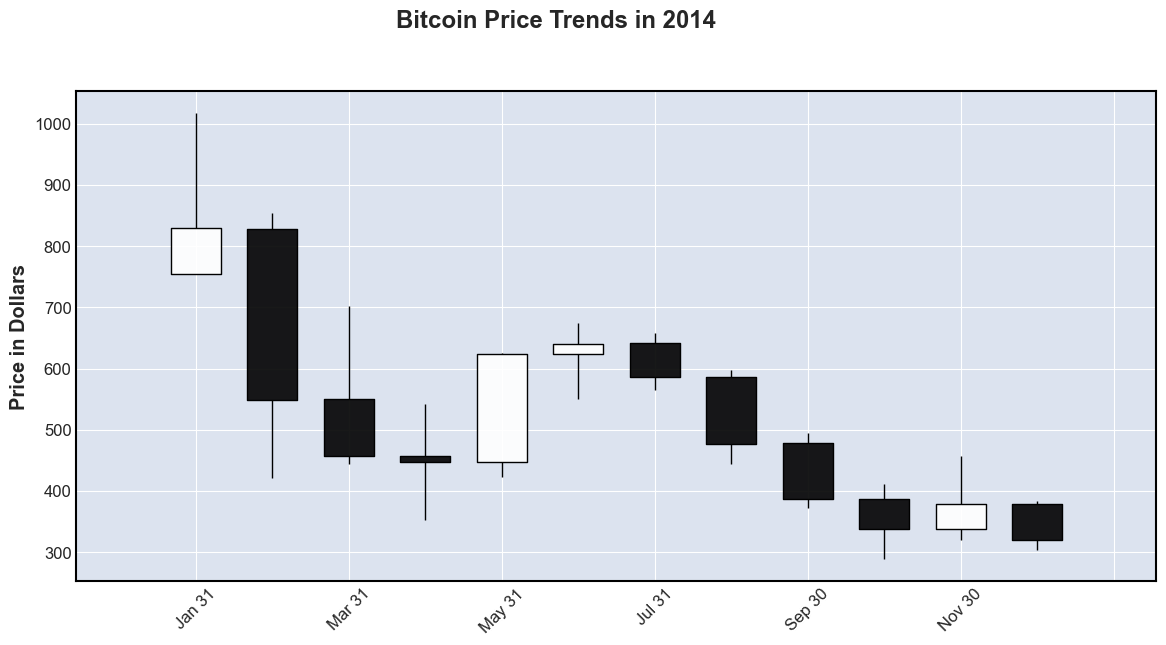

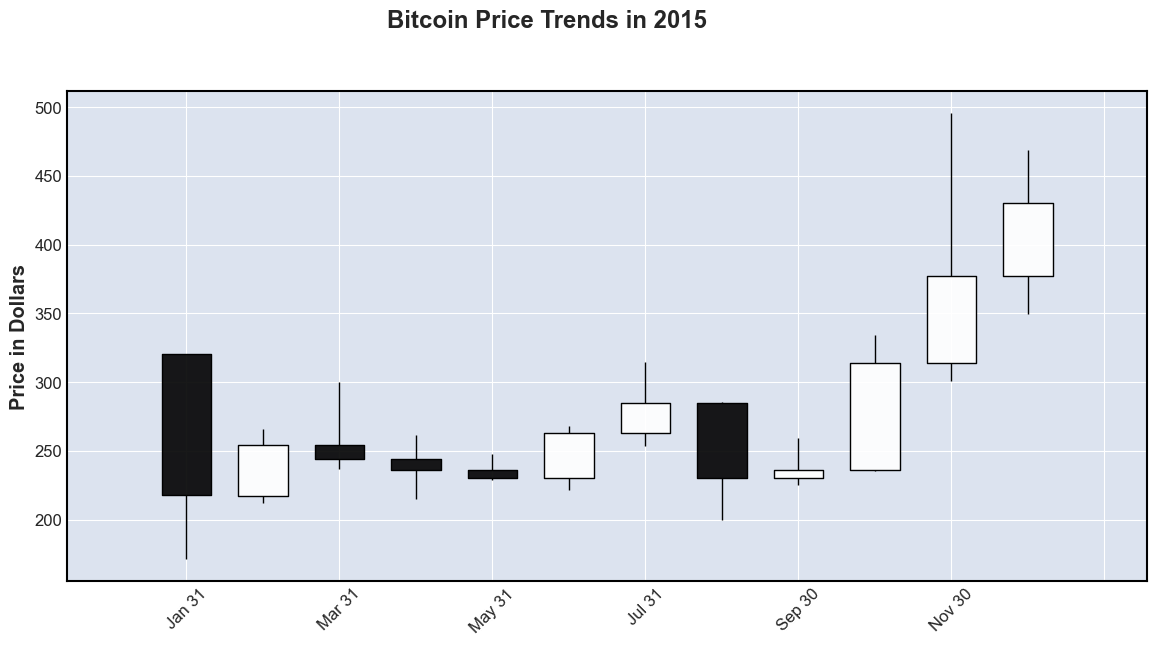

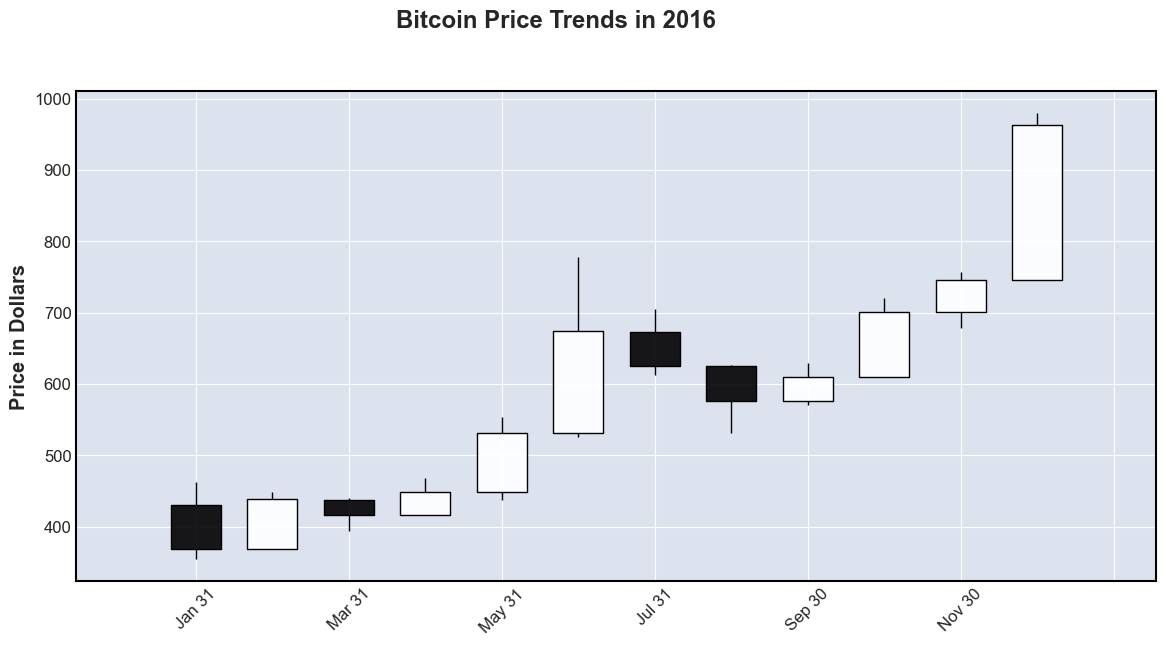

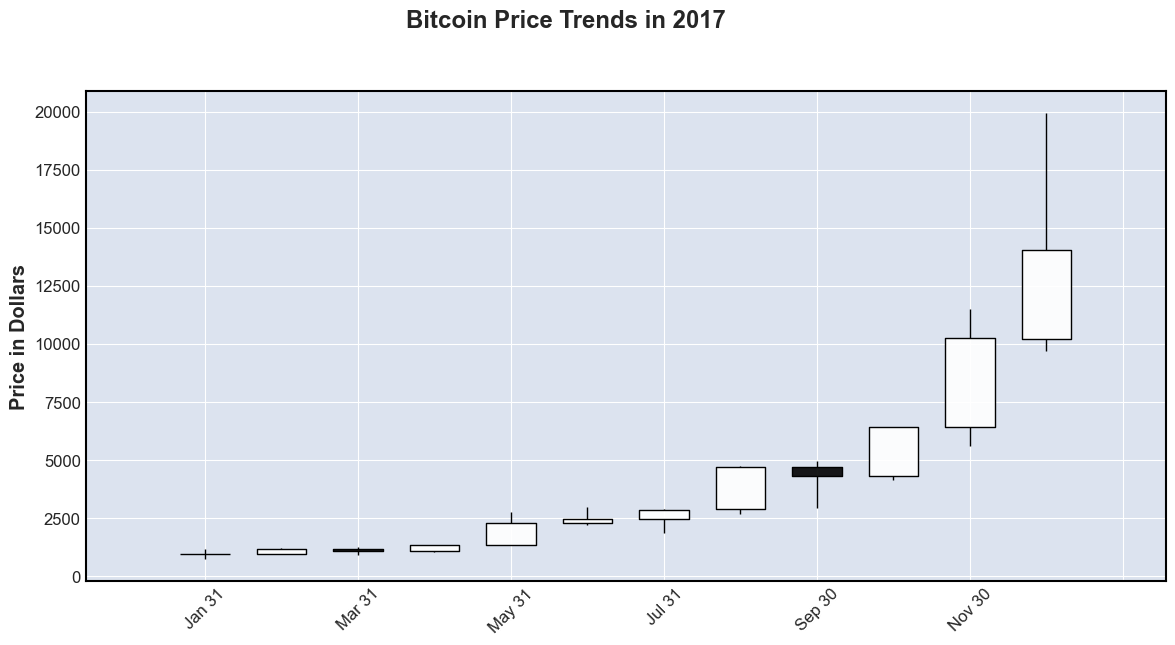

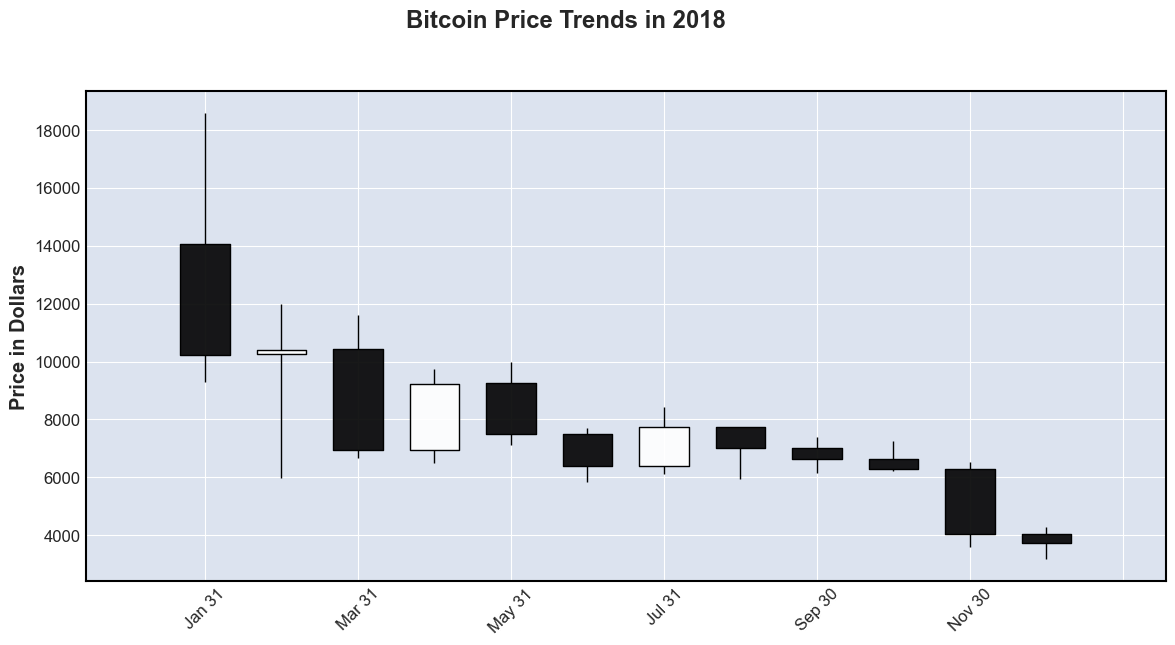

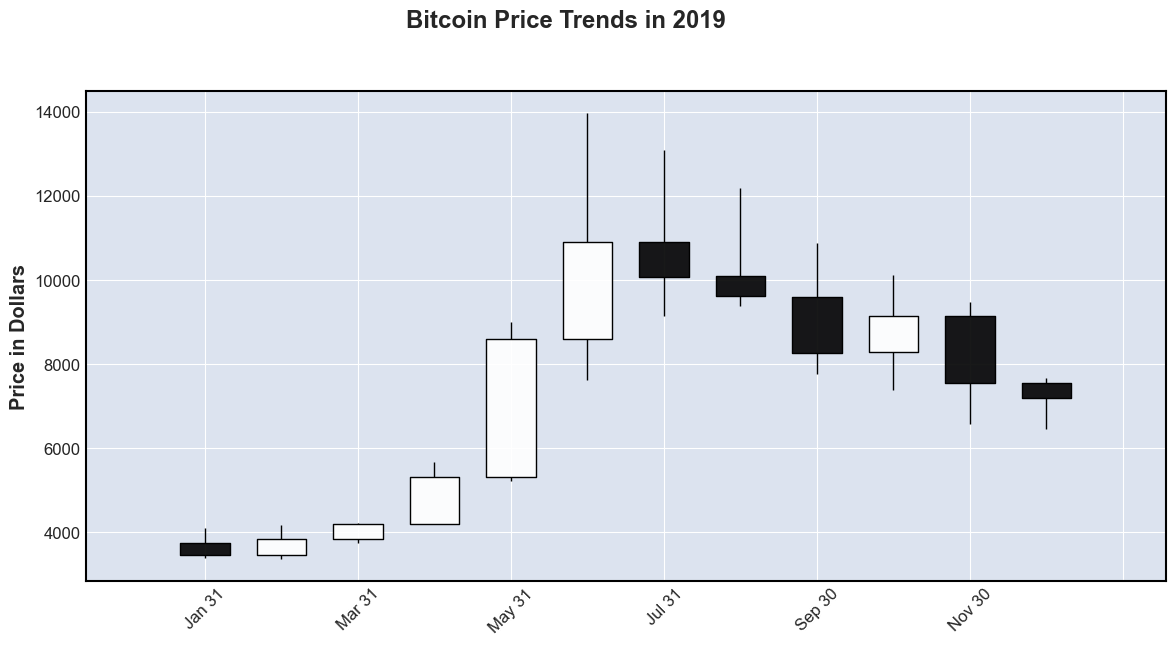

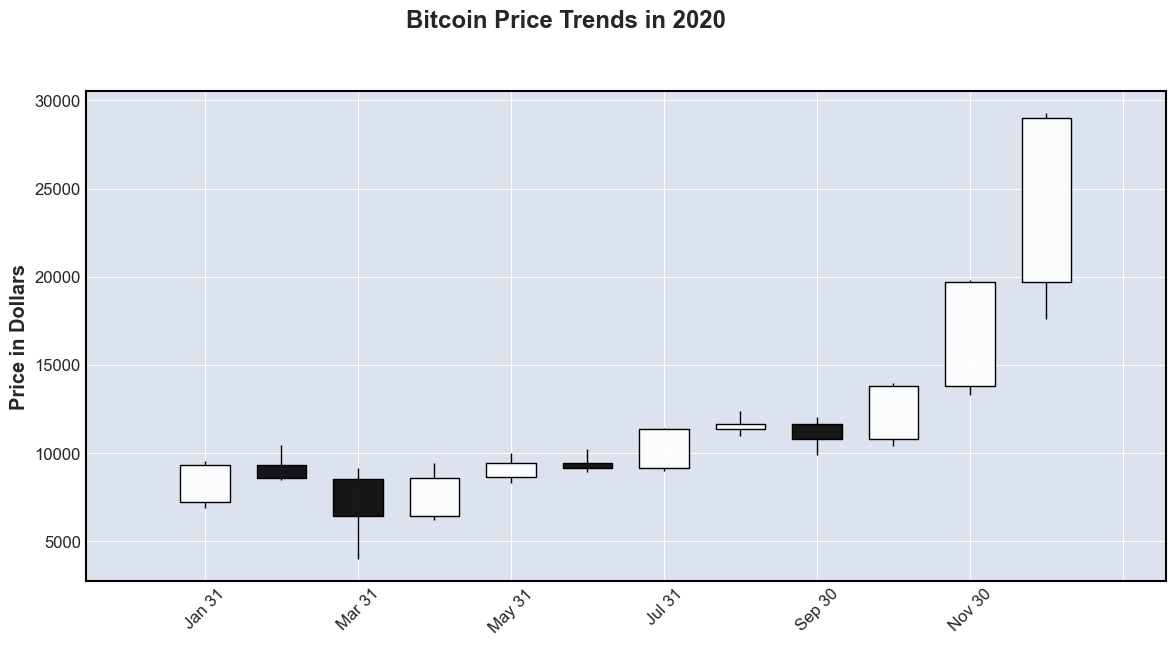

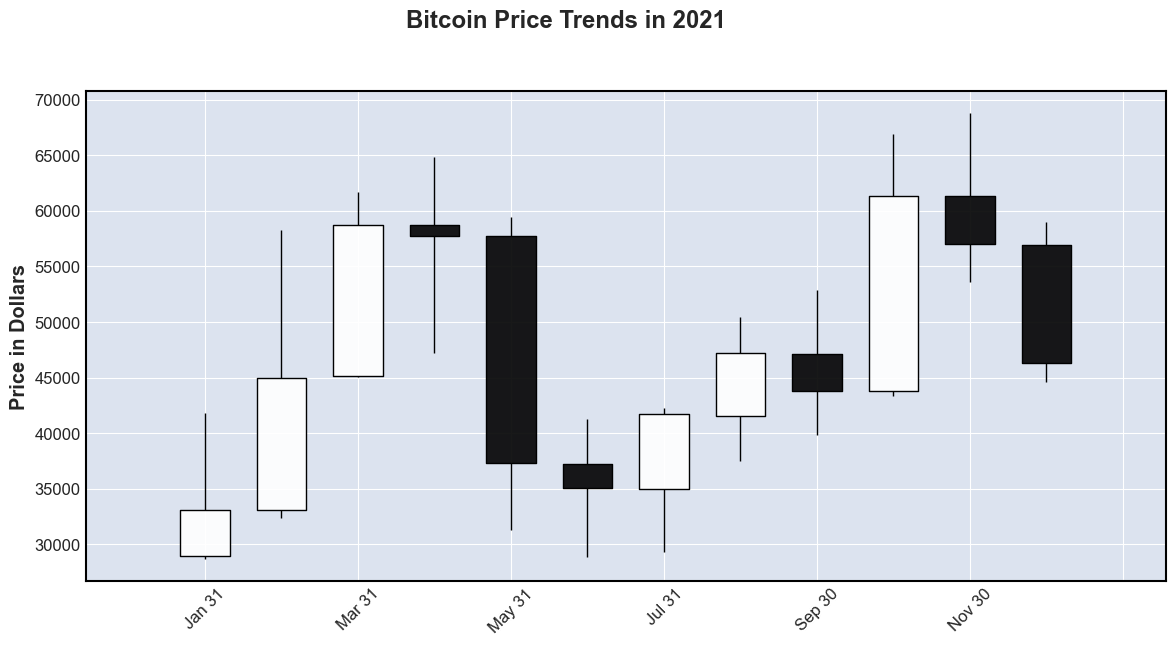

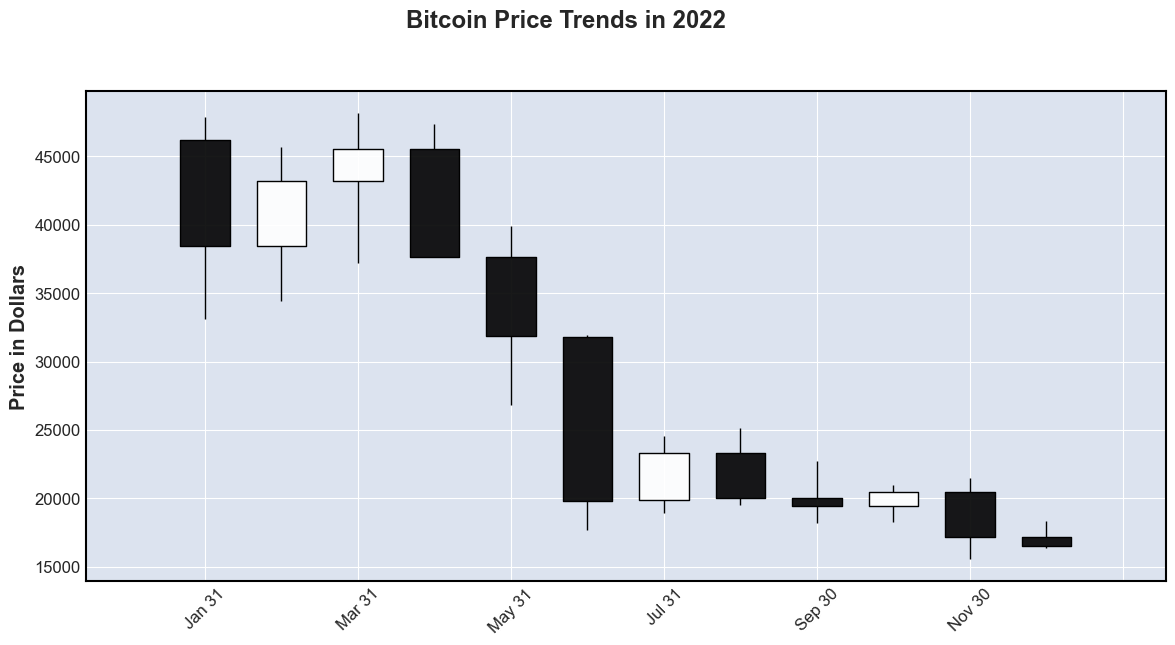

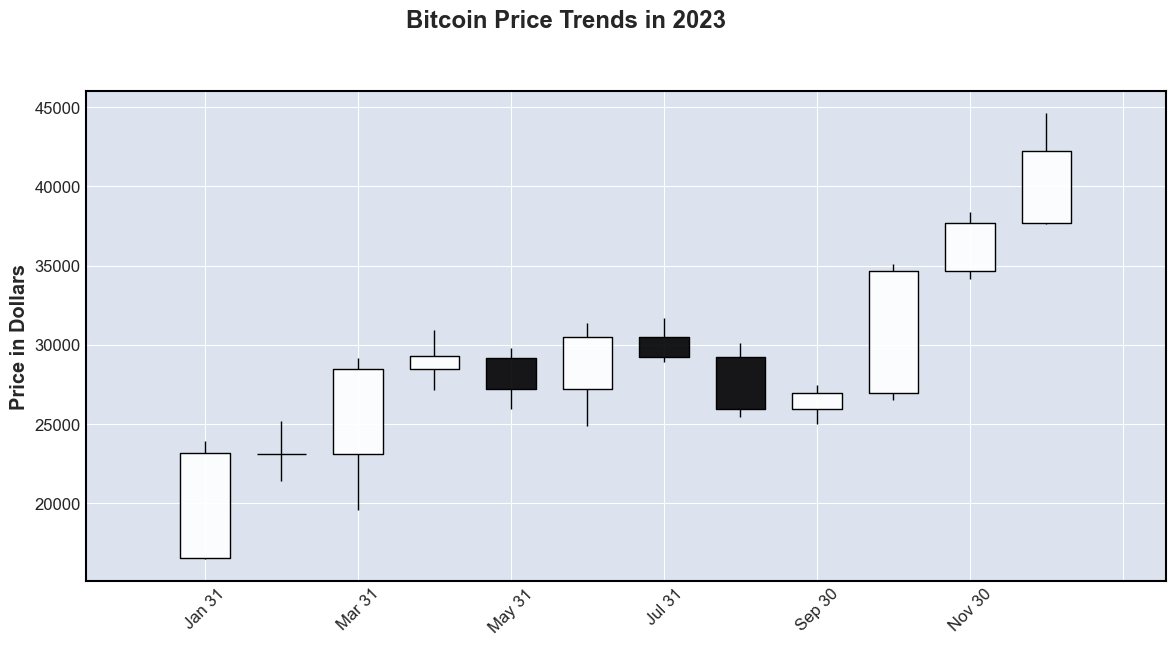

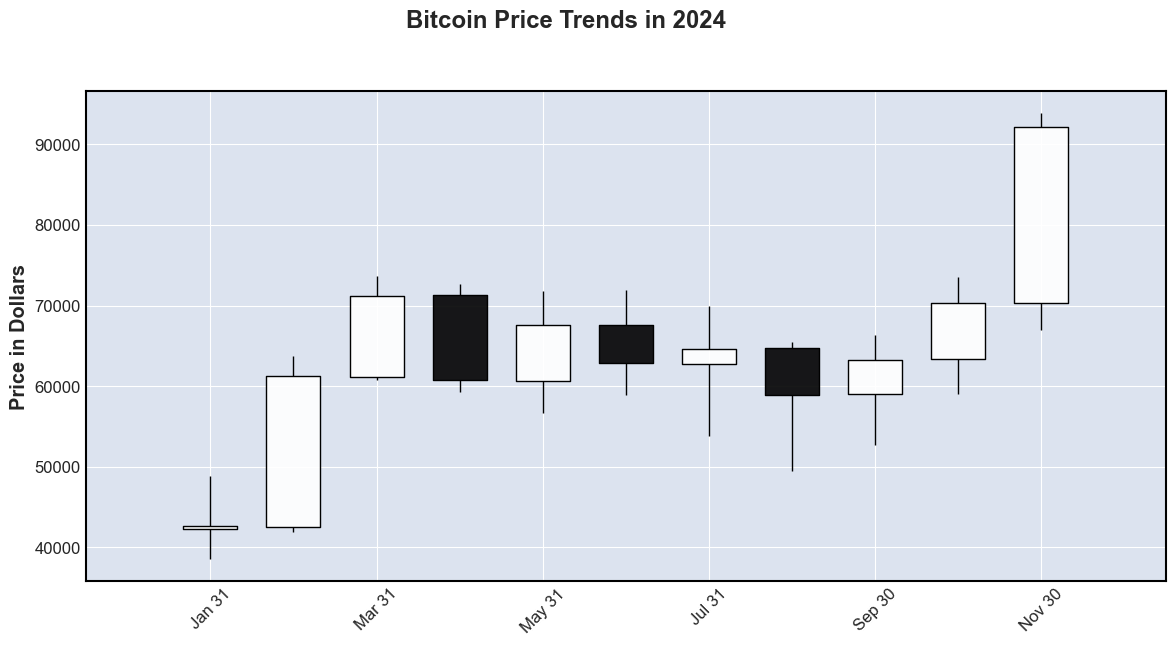

In [ ]:
# Resample the data to monthly frequency using 'ME' for month-end
df_monthly = df.resample('ME').agg({'Open': 'first', 'High': 'max', 'Low': 'min', 'Close': 'last'})

# Get the unique years from the data
years = df.index.year.unique()

# Plot the candlestick chart for each year separately
for year in sorted(years):
    # Filter the data for the specific year
    yearly_data = df_monthly[df_monthly.index.year == year]
    
    # Plot the candlestick chart for the year
    mpf.plot(yearly_data, type='candle', figsize=(15, 7), title=f'Bitcoin Price Trends in {year}', ylabel='Price in Dollars')

*Examine how trading volume and market capitalization relate to price*

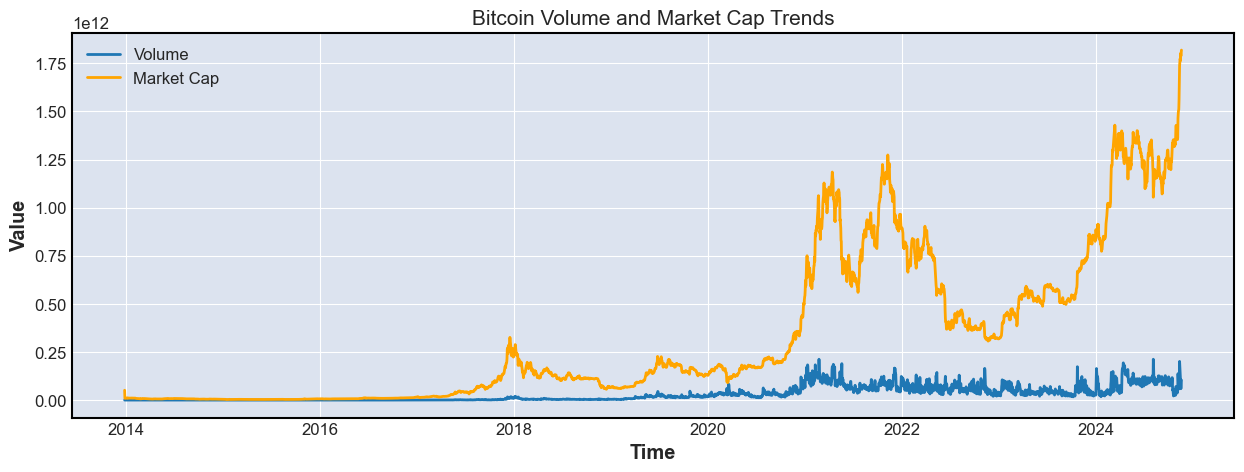

In [20]:
plt.figure(figsize=(15, 5))
plt.plot(df['Volume'], label='Volume')
plt.plot(df['Market Cap'], label='Market Cap', color='orange')
plt.title('Bitcoin Volume and Market Cap Trends', fontsize=15)
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

#### Correlations
*Analyze the strength of relationships between the numerical columns*

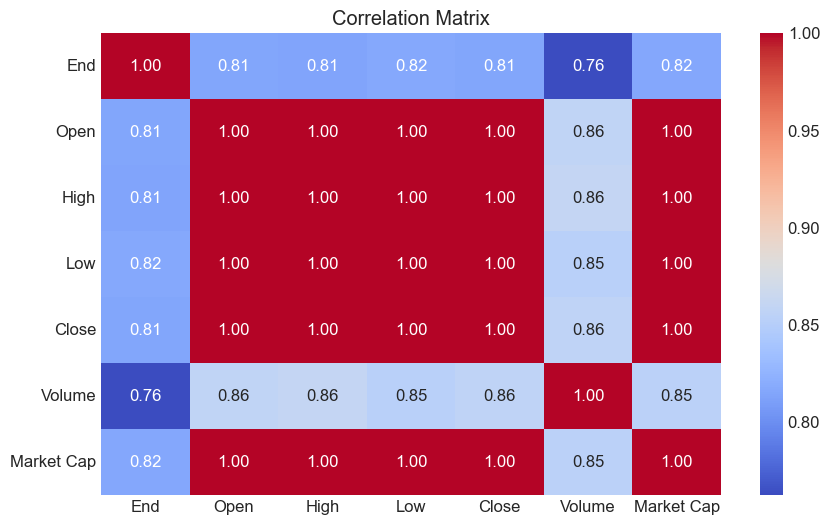

In [21]:
plt.figure(figsize=(10, 6))
sb.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [11]:
# Drop the 'End' column
df = df.drop(columns=['End'])

In [12]:
df

,Open,High,Low,Close,Volume,Market Cap
Start,,,,,,
2024-11-19,90406.06,93836.94,90406.06,92119.47,1.038971e+11,1.818537e+12
2024-11-18,89782.53,92532.00,89453.11,90549.34,7.825716e+10,1.799246e+12
2024-11-17,90642.34,91447.99,88768.66,89763.59,5.902029e+10,1.787376e+12
2024-11-16,91135.39,91735.96,90131.55,90543.67,8.743721e+10,1.801356e+12
2024-11-15,87681.91,91741.72,87140.65,90949.94,1.156032e+11,1.763629e+12
...,...,...,...,...,...,...
2013-12-31,760.32,760.58,738.17,754.01,2.036396e+07,9.160241e+09
2013-12-30,741.35,766.60,740.24,756.13,2.276158e+07,9.208370e+09
2013-12-29,728.05,748.61,714.44,745.05,2.522472e+07,8.855014e+09


In [16]:
df.to_csv('cleaned_data.csv', index=True)